In [224]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt

In [146]:
tw_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [147]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [148]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [149]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,Sealyham_terrier,0.234898,True,kuvasz,0.203495,True
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
1583,796865951799083009,https://pbs.twimg.com/media/Cw8JWZ2UsAAJOZ6.jpg,1,Cardigan,0.839129,True,Boston_bull,0.080699,True,Pembroke,0.034505,True
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True


In [150]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
tweet_json = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [152]:
tweet_json.sample(6)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
506,NaN,NaN,2016-12-24 17:18:34,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 812709052820099072, 'id_str'...",7373,False,This is Brandi and Harley. They are practicing...,NaN,...,0.0,NaN,NaN,NaN,1665,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1548,NaN,NaN,2016-01-18 18:36:07,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689154306549792769, 'id_str'...",3348,False,We normally don't rate birds but I feel bad co...,NaN,...,0.0,NaN,NaN,NaN,1128,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1274,NaN,NaN,2016-03-13 23:24:56,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 709158324613324805, 'id_str'...",2236,False,Meet Rodney. He's a Ukranian Boomchicka. Outsi...,NaN,...,0.0,NaN,NaN,NaN,470,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1379,NaN,NaN,2016-02-20 03:51:05,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 700890380988981249, 'id_str'...",2437,False,This is Chet. He's dapper af. His owners want ...,NaN,...,0.0,NaN,NaN,NaN,653,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
875,NaN,NaN,2016-08-03 17:43:45,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 760893927574605825, 'id_str'...",4228,False,This is Wishes. He has the day off. Daily stru...,NaN,...,0.0,NaN,NaN,NaN,1104,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1898,NaN,NaN,2015-12-09 18:59:46,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674664748949090304, 'id_str'...",994,False,This is Rodman. He's getting destroyed by the ...,NaN,...,0.0,NaN,NaN,NaN,276,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [153]:
# gathering read files( twitter_enhanced , image_predictions and Tweet_json )
tw_archive = pd.read_csv('twitter_archive_enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
tweet_json = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [154]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [155]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [156]:
tw_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [157]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [158]:
tw_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [159]:
print(tw_archive.doggo.value_counts())
print()
print(tw_archive.floofer.value_counts())
print()
print(tw_archive.pupper.value_counts())
print()
print(tw_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [160]:
tw_archive.retweeted_status_id.notnull().sum()

181

In [161]:
tw_archive.in_reply_to_status_id.notnull().sum()

78

In [162]:
tw_archive[185:190]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,279280991.0,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
187,856282028240666624,NaN,NaN,2017-04-23 23:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [163]:
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [164]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [165]:
image_predictions.head(n=15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [166]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [167]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [168]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [169]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [170]:
tweet_json.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [171]:
tweet_json.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [172]:
tweet_json.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [173]:
# gathering 3 files( twitter_enhanced , image_predictions and Tweet_json )
tw_archive = pd.read_csv('twitter_archive_enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
tweet_json = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [174]:
# cleaning twitter archived 
cleaned_archive = tw_archive.copy()

In [175]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [176]:
cleaned_archive = cleaned_archive[cleaned_archive['in_reply_to_status_id'].isnull()]

In [177]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

In [178]:
cleaned_archive = cleaned_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [179]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [180]:
cleaned_archive = cleaned_archive.drop(['expanded_urls'], axis = 1)

In [181]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [182]:
cleaned_archive.loc[cleaned_archive['rating_numerator']==50, ['rating_numerator']] = 10
cleaned_archive.loc[cleaned_archive['rating_denominator']==50, ['rating_denominator']] = 10

cleaned_archive.loc[cleaned_archive['rating_numerator']==88, ['rating_numerator']] = 11
cleaned_archive.loc[cleaned_archive['rating_denominator']==80, ['rating_denominator']] = 10

cleaned_archive.loc[cleaned_archive['rating_numerator']==80, ['rating_numerator']] = 10
cleaned_archive.loc[cleaned_archive['rating_denominator']==80, ['rating_denominator']] = 10

cleaned_archive.loc[cleaned_archive['rating_numerator']==44, ['rating_numerator']] = 11
cleaned_archive.loc[cleaned_archive['rating_denominator']==40, ['rating_denominator']] = 10

In [183]:
cleaned_archive[cleaned_archive['rating_numerator'] > 20 ]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",45,10,None,None,None,None,None


In [184]:
len(cleaned_archive[cleaned_archive['rating_numerator'] > 20 ])

15

In [185]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [186]:
cleaned_archive = cleaned_archive[cleaned_archive['rating_numerator'] != 0 ]
cleaned_archive = cleaned_archive[cleaned_archive['rating_denominator'] >= 10 ]
cleaned_archive = cleaned_archive[cleaned_archive['rating_numerator'] <= 20 ]
cleaned_archive = cleaned_archive[cleaned_archive['rating_denominator'] < 20 ]

In [187]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2260 non-null int64
timestamp             2260 non-null object
source                2260 non-null object
text                  2260 non-null object
rating_numerator      2260 non-null int64
rating_denominator    2260 non-null int64
name                  2260 non-null object
doggo                 2260 non-null object
floofer               2260 non-null object
pupper                2260 non-null object
puppo                 2260 non-null object
dtypes: int64(3), object(8)
memory usage: 211.9+ KB


In [188]:
cleaned_archive =  cleaned_archive.replace('None', np.nan)

In [189]:
cleaned_archive.loc[cleaned_archive['doggo'] == 'doggo', 'dog_class'] = 'doggo'
cleaned_archive.loc[cleaned_archive['floofer'] == 'floofer', 'dog_class'] = 'floofer'
cleaned_archive.loc[cleaned_archive['pupper'] == 'pupper', 'dog_class'] = 'pupper'
cleaned_archive.loc[cleaned_archive['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [190]:
cleaned_archive.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [191]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2260 non-null int64
timestamp             2260 non-null object
source                2260 non-null object
text                  2260 non-null object
rating_numerator      2260 non-null int64
rating_denominator    2260 non-null int64
name                  1602 non-null object
doggo                 93 non-null object
floofer               10 non-null object
pupper                252 non-null object
puppo                 29 non-null object
dog_class             371 non-null object
dtypes: int64(3), object(9)
memory usage: 229.5+ KB


In [192]:
cleaned_archive = cleaned_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [193]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2260 non-null int64
timestamp             2260 non-null object
source                2260 non-null object
text                  2260 non-null object
rating_numerator      2260 non-null int64
rating_denominator    2260 non-null int64
name                  1602 non-null object
dog_class             371 non-null object
dtypes: int64(3), object(5)
memory usage: 158.9+ KB


In [194]:
#cleaning image prediction 
cleaned_images = image_predictions.copy()

In [195]:
cleaned_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [196]:
cleaned_images= cleaned_images.rename(columns={'p1':'probability1', 'p2':'probability2', 'p3':'probability3'})

In [197]:
cleaned_images = cleaned_images[cleaned_images['p1_conf'] > 0.5 ]

In [198]:
cleaned_images = cleaned_images.filter(['tweet_id','probability1','p1_conf'] )

In [199]:
cleaned_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1 to 2072
Data columns (total 3 columns):
tweet_id        1239 non-null int64
probability1    1239 non-null object
p1_conf         1239 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7+ KB


In [200]:
cleaned_images = cleaned_images.groupby('probability1').filter(lambda x: len(x) > 5)

In [201]:
cleaned_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 2 to 2072
Data columns (total 3 columns):
tweet_id        881 non-null int64
probability1    881 non-null object
p1_conf         881 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.5+ KB


In [202]:
#cleaning twitter_json
cleaned_status = tweet_json.copy()

In [203]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [204]:
cleaned_status = cleaned_status.rename(columns={'id':'tweet_id'})

In [205]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [206]:
cleaned_status = cleaned_status.filter(['tweet_id','favorite_count','retweet_count', 'source', 'user'] )

In [207]:
cleaned_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
source            2354 non-null object
user              2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [208]:
twitter_df = pd.merge(cleaned_archive, cleaned_images, how='outer', on=['tweet_id'])

In [209]:
twitter_df = pd.merge(twitter_df, cleaned_status, how = 'outer', on=['tweet_id'])

In [210]:
twitter_df.sample(5)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dog_class,probability1,p1_conf,favorite_count,retweet_count,source_y,user
1254,707377100785885184,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,9.0,10.0,NaN,NaN,golden_retriever,0.637225,3603.0,1214.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1709,677644091929329666,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,11.0,10.0,a,NaN,Chihuahua,0.626236,2040.0,886.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
712,779377524342161408,2016-09-23 17:50:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,12.0,10.0,NaN,pupper,NaN,NaN,9831.0,3613.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1828,674318007229923329,2015-12-08 20:01:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's in quite the predicament....,8.0,10.0,Lennon,pupper,NaN,NaN,1516.0,570.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2316,722974582966214656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4493.0,1764.0,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [211]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null int64
timestamp             2260 non-null object
source_x              2260 non-null object
text                  2260 non-null object
rating_numerator      2260 non-null float64
rating_denominator    2260 non-null float64
name                  1602 non-null object
dog_class             371 non-null object
probability1          881 non-null object
p1_conf               881 non-null float64
favorite_count        2354 non-null float64
retweet_count         2354 non-null float64
source_y              2354 non-null object
user                  2354 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 276.1+ KB


In [212]:
twitter_df.to_csv('twitter_archive_master.csv')

In [213]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [214]:
# finding the top four dog names that are popular
twitter_master['name'].value_counts().sort_values(ascending=False)

a           54
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Toby         7
Buddy        7
Daisy        7
Jax          6
Milo         6
Bella        6
Dave         6
Leo          6
Scout        6
Jack         6
Koda         6
Oscar        6
Rusty        6
Stanley      6
an           6
Larry        5
Sammy        5
            ..
Mary         1
Peanut       1
Taz          1
Charl        1
Jaspers      1
Wiggles      1
Dante        1
Nico         1
Comet        1
Craig        1
Odin         1
Dex          1
Tonks        1
Arnold       1
Aqua         1
Brownie      1
Gilbert      1
Lizzie       1
Horace       1
Kingsley     1
Mollie       1
JD           1
Rupert       1
Rhino        1
Ike          1
space        1
Zuzu         1
Steve        1
Winifred     1
Grey         1
Name: name, Length: 953, dtype: int64

In [219]:
# checking the average rating for each dog stage
twitter_master.groupby('dog_class')['rating_numerator'].mean()

dog_class
doggo      11.875000
floofer    11.800000
pupper     10.805556
puppo      12.103448
Name: rating_numerator, dtype: float64

Text(0.5,1,'Number of tweets in each month')

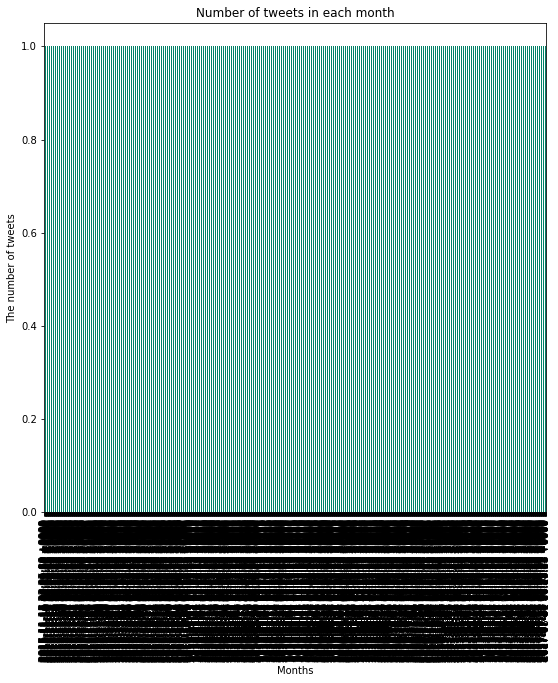

In [238]:
# checking the number of tweets in each month
tweets_in_month = twitter_master.groupby('timestamp')['tweet_id'].count()
fig, ax = plt.subplots(figsize=(9,9))
tweets_in_month.plot(ax=ax,kind="bar",colormap='summer')
ax.set_xlabel('Months')
ax.set_ylabel('The number of tweets')
ax.set_title('Number of tweets in each month')